@Olga Zagovora, zagovora@uni-koblenz.de

# Exercise 2

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 21 23:42:35 2016

@author: koroksengupta, olgazagvora
"""

import urllib2, urlparse
import re
import os

def htmlextractor(url,save=False):
    if url in visited:
        return

    global _webpage_count
    global _link_count
    visited.add(url)       
    try:
        response = urllib2.urlopen(url)
    except urllib2.HTTPError:
        #print 'HTTP Error',url
        return
    if response.getcode() == 200:
        _webpage_count +=1
        html = response.read()
        links= set(re.findall('href="?\'?([^"\'>]*)', html))
        _link_count += len(links)
        #%timeit [l for l in links if '//141.26.208.82/' in l]
        #%timeit filter(lambda x: '//141.26.208.82/' in x, links)
        #%timeit [l for l in links if '../'==l[:3]]
        
        internal_link = [l for l in links if '../'==l[:3]]
        #internal_link.extend([l for l in links if (('//141.26.208.82/' in l) | ('/'==l[0]))])
        external_link=set(links)-set(internal_link)
        #print len(internal_link),len(external_link)
        int_counter.append(len(internal_link))
        ext_counter.append(len(external_link))
        
        
        #slow solution
        if save:
            if "http://141.26.208.82" in url:
                path_url=url.replace("http://141.26.208.82",my_folder)
            else:
                path_url=os.path.normpath(my_folder+url)
            directory=os.path.dirname(path_url)
            if not os.path.exists(directory):
                os.makedirs(directory)
            with open(path_url,"wb") as outfile: #we have utf-8 encoding
                outfile.write(html)

        queue.extend(map(lambda e: urlparse.urljoin(url, e), internal_link))

In [5]:
int_counter=[]
ext_counter=[]

links=[]
visited = set()
queue = []

_webpage_count= 0
_link_count = 0


my_folder="D:/Uni/WS2016-2017/HiWi Job Intro to Web Science/Assignments/5/wiki2"
url = 'http://141.26.208.82/articles/g/e/r/Germany.html'
queue.append(url)
i=1
while len(queue)>0:
    url = queue.pop(0)
    htmlextractor(url)
    
    #test
    if i>0:
        break
        
    if i % 10000==0:
        print "Pages:",_webpage_count, "links:",_link_count
    i+=1   

Pages: 1 links: 626


## Experiments with timeit

In [6]:
%timeit [l for l in links if '//141.26.208.82/' in l]

%timeit filter(lambda x: '//141.26.208.82/' in x, links)


The slowest run took 8.09 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 381 ns per loop
The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.49 µs per loop


In [7]:

def check_fun(x):
    for l in links:
        if x in l:
            list2.append(l)

list2=[]            
            
%timeit check_fun('//141.26.208.82/')

The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 925 ns per loop


### save data

In [ ]:

import json

pages_links=[_webpage_count,_link_count]

with open("internal_links.json","w+") as f:
    json.dump(int_counter,f)
with open("external_links.json","w+") as f:
    json.dump(ext_counter,f)
with open("pages_links.json","w+") as f:
    json.dump(pages_links,f)

# Exercise 3

In [22]:
#load all numbers
import json
with open("internal_links.json") as f:
    int_counter=json.load(f)
with open("external_links.json") as f:
    ext_counter=json.load(f)
with open("pages_links.json") as f:
    pages_links=json.load(f) 



In [23]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt


all_links=[x+y for x,y in zip(int_counter,ext_counter)]
print "Median:",np.median(all_links)
print "Mean:",np.mean(all_links)
print "Number of pages:",pages_links[0],"Number of links:",pages_links[1]

Populating the interactive namespace from numpy and matplotlib
Median: 62.0
Mean: 77.0662258834
Number of pages: 80918 Number of links: 5752080


`%matplotlib` prevents importing * from pylab and numpy


## What is median mean and mode?
By Cmglee (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0) or GFDL (http://www.gnu.org/copyleft/fdl.html)], via Wikimedia Commons

<img src="Comparison_mean_median_mode.svg.png">

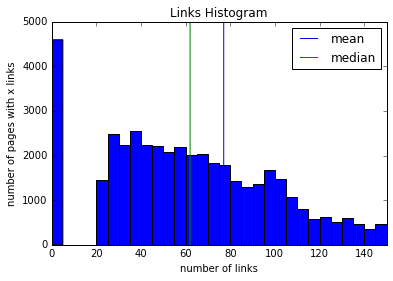

In [24]:
plt.hist(all_links,bins=range(0, 155, 5))
plt.plot([np.mean(all_links)]*len(range(1,5000)),range(1,5000),"b",label="mean")
plt.plot([np.median(all_links)]*len(range(1,5000)),range(1,5000),"g",label="median")
plt.ylabel("number of pages with x links")
plt.xlabel("number of links")
plt.title("Links Histogram")
plt.xlim(0,150)
plt.legend()
plt.show()

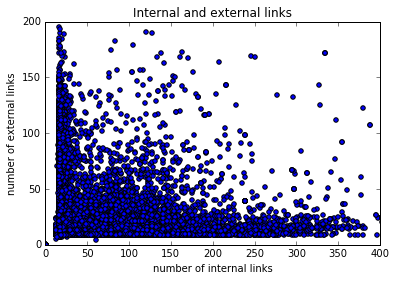

In [25]:
plt.scatter(int_counter,ext_counter)
plt.title("Internal and external links")
plt.xlabel("number of internal links")
plt.ylabel("number of external links")
plt.xlim(0,400)
plt.ylim(0,200)
plt.show()

# Example of multithreading -> next week

In [248]:
from IPython.display import display
from ipywidgets import IntProgress

import threading

class App(object):
    def __init__(self, nloops=2000):
        self.nloops = nloops
        self.pb = IntProgress(description='Thread loops', min=0, max=self.nloops)

    def start(self):
        display(self.pb)
        while self.pb.value < self.nloops:
            self.pb.value += 1 
        self.pb.color = 'red'

app = App(nloops=20000)

t = threading.Thread(target=app.start)

t.start()
#t.join()